In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import array

Classification Problem:  Our goal is to employ machine learning (ML) methods to forecast, diagnose, and manage chronic kidney disease (CKD). We are given a wide range of variables in the data including age and whether the patient has certian conditoins like anemia or coronary artery disease. We will build models that use these variables to best predict whether a given patient will have chronic kidney disease. We are given the target variable 'class' which specifies whether the patient has chronic kidney disease or not.

Variable Transformation:
By looking out the output, we can see that the hypertension, diabetes mellitus, coronary artery disease, appetite, pedal edema, anemia are all supposed to be of type binary. In the dataset however, the input for these columns are written as yes or no, good or poor. We need to convert these into binary types. Furthermore, we also see that red blood cells, pus cell, pus cell clumps and bacteria have the same problem, as well as the Target, which should defintely be a binary number.


In [22]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

# Fetch dataset
chronic_kidney_disease = fetch_ucirepo(id=336)

# Create pandas DataFrame for features (X)
X = pd.DataFrame(data=chronic_kidney_disease.data.features, columns=chronic_kidney_disease.feature_names)

# Create pandas DataFrame for targets (y)
y = pd.DataFrame(data=chronic_kidney_disease.data.targets, columns=["class"])

# Combining features and targets into a single DataFrame
data = pd.concat([X, y], axis=1)

# Clean column names for categorical variable "dm" (diabetes mellitus)
data['dm'] = data['dm'].replace(['\tno', 'no'], 'no')
data['dm'] = data['dm'].replace(['yes'], 'yes')

# Clean column for categorical variables "rbc"
# Replace missing values with the mode of the column
data['rbc'].fillna("normal", inplace=True)

# Clean column names for target variable "class"
data['class'] = data['class'].replace(['ckd\t', 'notckd'], 'notckd')
data['class_ckd'] = (data['class'] == 'ckd').astype(int)  # Create binary column indicating presence of CKD

# Drop original "class" column
data.drop('class', axis=1, inplace=True)

# Create binary columns for each remaining categorical variable
data_with_dummies = pd.get_dummies(data, columns=["rbc", "pc", "pcc", "ba", "htn", "dm", "cad", "appet", "pe", "ane"], drop_first=True, dtype=int)

print(data_with_dummies.dtypes)


age            float64
bp             float64
sg             float64
al             float64
su             float64
bgr            float64
bu             float64
sc             float64
sod            float64
pot            float64
hemo           float64
pcv            float64
wbcc           float64
rbcc           float64
class_ckd        int32
rbc_normal       int32
pc_normal        int32
pcc_present      int32
ba_present       int32
htn_yes          int32
dm_yes           int32
cad_yes          int32
appet_poor       int32
pe_yes           int32
ane_yes          int32
dtype: object


    age    bp     sg   al   su    bgr    bu   sc    sod  pot  ...  rbc_normal  \
0  48.0  80.0  1.020  1.0  0.0  121.0  36.0  1.2    NaN  NaN  ...           1   
1   7.0  50.0  1.020  4.0  0.0    NaN  18.0  0.8    NaN  NaN  ...           1   
2  62.0  80.0  1.010  2.0  3.0  423.0  53.0  1.8    NaN  NaN  ...           1   
3  48.0  70.0  1.005  4.0  0.0  117.0  56.0  3.8  111.0  2.5  ...           1   
4  51.0  80.0  1.010  2.0  0.0  106.0  26.0  1.4    NaN  NaN  ...           1   

   pc_normal  pcc_present  ba_present  htn_yes  dm_yes  cad_yes  appet_poor  \
0          1            0           0        1       1        0           0   
1          1            0           0        0       0        0           0   
2          1            0           0        0       1        0           1   
3          0            1           0        1       0        0           1   
4          1            0           0        0       0        0           0   

   pe_yes  ane_yes  
0       0        

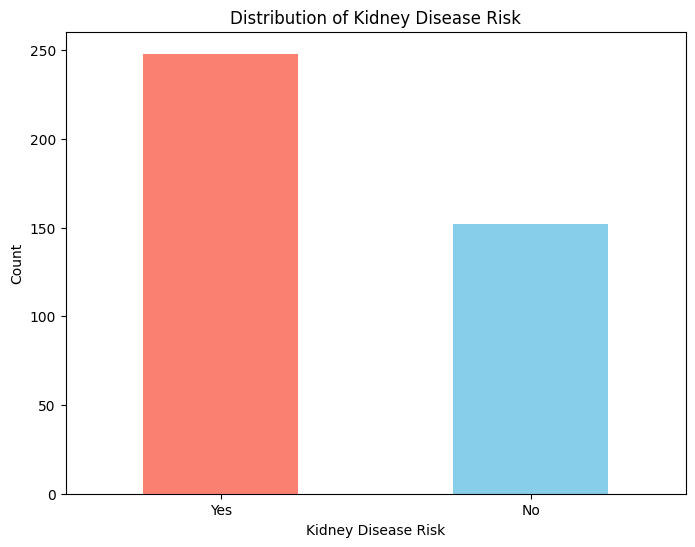

In [4]:
# Data Set Overview
print(data_with_dummies.head())
print(data_with_dummies.dtypes)
print(data_with_dummies.shape)
print("\nSummary Statistics:")
print(data_with_dummies.describe())

missing_values = data_with_dummies.isnull().sum()
print(missing_values)
print(data.shape)


# Count occurrences of each category
ckd_counts = data_with_dummies['class_ckd'].value_counts()

print(ckd_counts)

# Plotting
plt.figure(figsize=(8, 6))
ckd_counts.plot(kind='bar', color=['salmon', 'skyblue'])  # Swapped color order
plt.title('Distribution of Kidney Disease Risk')
plt.xlabel('Kidney Disease Risk')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Yes', 'No'], rotation=0)  # Swapped labels
plt.show()

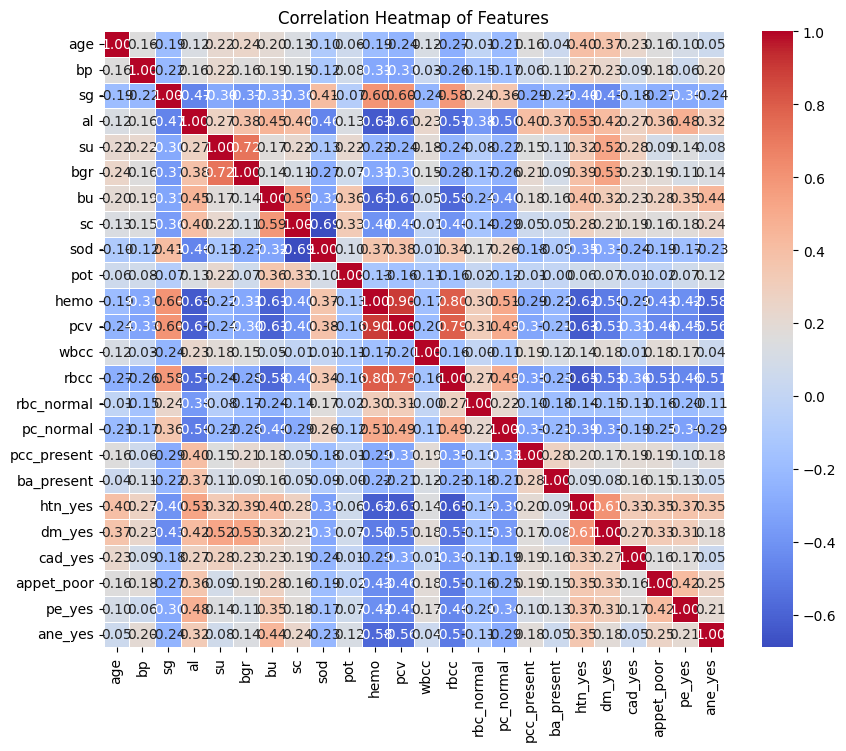

In [5]:
# Association between variables
import seaborn as sns

# remove'class'
data_with_dummies_excluded = data_with_dummies.drop(['class_ckd'], axis=1)

# correlation matrix
correlation_matrix = data_with_dummies_excluded.corr()

# correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Features')
plt.show()



Missing Values: We see in the original data, that the binary columns have a low number of missing values. 

In [20]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

# fetch dataset
chronic_kidney_disease = fetch_ucirepo(id=336)

# create pandas DataFrame for features (X)
X = pd.DataFrame(data=chronic_kidney_disease.data.features, columns=chronic_kidney_disease.feature_names)

# create pandas DataFrame for targets (y)
y = pd.DataFrame(data=chronic_kidney_disease.data.targets, columns=["class"])

# Combining features and targets into a single DataFrame
data = pd.concat([X, y], axis=1)

missing_values = data.isnull().sum()
print(missing_values)
print(data.shape)



age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64
(400, 25)


WE see that the variables with the most missing values are red blood cell = 152, white blood cell count = 106, and red blood cell count = 131. We note that rbc was transformed into rbc_normal. 

rbc
normal      201
abnormal     47
Name: count, dtype: int64
rbc_normal
1    353
0     47
Name: count, dtype: int64


<Axes: xlabel='class', ylabel='Count'>

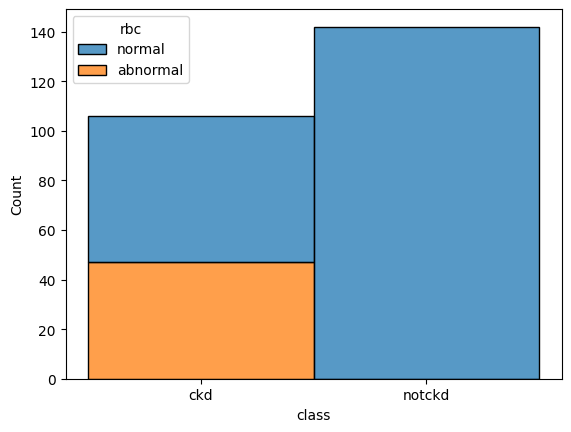

In [7]:
# Count occurrences of each category
rbc_counts = data['rbc'].value_counts()
print(rbc_counts)

rbc_normal_counts = data_with_dummies['rbc_normal'].value_counts()
print(rbc_normal_counts)


# We see that the most occuring value is normal rbc. We see that 12% of the data is abnormal rbc, and 38% of the data is missing. 
# using mode imputation, we can convert these missing values to be assigned the value of normal.

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data['class'] = data['class'].replace(['ckd\t', 'notckd'], 'notckd')
data['class_ckd'] = (data['class'] == 'ckd').astype(int)  # Create binary column indicating presence of CKD
sns.histplot(binwidth=0.5, x="class", hue="rbc", data=data, stat="count", multiple="stack")

In [9]:
#Now lets look at the missing values in the transformed data 
missing_values = data_with_dummies.isnull().sum()
print(missing_values)
print(data_with_dummies.shape)


# Count the number of missing values in each row
missing_values_per_row = data_with_dummies.isnull().sum(axis=1)

# Count the total number of rows with missing values
total_rows_with_missing_values = (missing_values_per_row > 0).sum()

print("Total rows with missing values:", total_rows_with_missing_values)


age              9
bp              12
sg              47
al              46
su              49
bgr             44
bu              19
sc              17
sod             87
pot             88
hemo            52
pcv             71
wbcc           106
rbcc           131
class_ckd        0
rbc_normal       0
pc_normal        0
pcc_present      0
ba_present       0
htn_yes          0
dm_yes           0
cad_yes          0
appet_poor       0
pe_yes           0
ane_yes          0
dtype: int64
(400, 25)
Total rows with missing values: 197


We see that 197 out of 400 rows have missing values. We use soft imputation (explain choice later)

In [10]:
#4
print(data_with_dummies.mean())
print(data_with_dummies.var())


age              51.483376
bp               76.469072
sg                1.017408
al                1.016949
su                0.450142
bgr             148.036517
bu               57.425722
sc                3.072454
sod             137.528754
pot               4.627244
hemo             12.526437
pcv              38.884498
wbcc           8406.122449
rbcc              4.707435
class_ckd         0.620000
rbc_normal        0.882500
pc_normal         0.647500
pcc_present       0.105000
ba_present        0.055000
htn_yes           0.367500
dm_yes            0.342500
cad_yes           0.085000
appet_poor        0.205000
pe_yes            0.190000
ane_yes           0.150000
dtype: float64
age            2.947991e+02
bp             1.872419e+02
sg             3.267971e-05
al             1.829740e+00
su             1.208221e+00
bgr            6.285590e+03
bu             2.550554e+03
sc             3.296053e+01
sod            1.083421e+02
pot            1.020102e+01
hemo           8.483161e+00
pc

We must scale the data since wbcc has a mean of 8406, but we need to exclude binaries

In [23]:
from sklearn.preprocessing import StandardScaler

# Assuming 'data_with_dummies' is your DataFrame containing the data

# Extract continuous variables from the DataFrame
continuous_column_names = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']
continuous_data = data_with_dummies[continuous_column_names]

# Initialize StandardScaler
scaler = StandardScaler()

# Scale the continuous variables
scaled_continuous_data = scaler.fit_transform(continuous_data)

# Create a DataFrame with scaled continuous variables and original binary variables
scaled_data = pd.DataFrame(scaled_continuous_data, columns=continuous_column_names, index=data_with_dummies.index)
scaled_data[['class_ckd', 'rbc_normal', 'pc_normal', 'pcc_present', 'ba_present', 'htn_yes', 'dm_yes', 'cad_yes', 'appet_poor', 'pe_yes', 'ane_yes']] = data_with_dummies[['class_ckd', 'rbc_normal', 'pc_normal', 'pcc_present', 'ba_present', 'htn_yes', 'dm_yes', 'cad_yes', 'appet_poor', 'pe_yes', 'ane_yes']]

# Now, 'scaled_data' contains the scaled continuous variables and original binary variables


In [26]:
from fancyimpute import SoftImpute
import pandas as pd

# Assuming 'data_with_dummies' is your DataFrame containing the data
# Replace 'data_with_dummies' with your actual DataFrame

# Perform imputation using SoftImpute
data_imputed = SoftImpute().fit_transform(scaled_data)

# Original column names without numbers
original_column_names = [
    'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot',
    'hemo', 'pcv', 'wbcc', 'rbcc', 'class_ckd', 'rbc_normal', 'pc_normal',
    'pcc_present', 'ba_present', 'htn_yes', 'dm_yes', 'cad_yes', 'appet_poor',
    'pe_yes', 'ane_yes'
]

# Convert the imputed array back to a DataFrame with original column names
data_imputed_df = pd.DataFrame(data_imputed, columns=original_column_names)

# Apply a threshold to binary variables
binary_column_names = ['class_ckd', 'rbc_normal', 'pc_normal', 'pcc_present', 'ba_present', 'htn_yes', 'dm_yes', 'cad_yes', 'appet_poor', 'pe_yes', 'ane_yes']
threshold = 0.5  # Adjust the threshold as needed
data_imputed_df[binary_column_names] = (data_imputed_df[binary_column_names] > threshold).astype(int)

# Now, 'data_imputed_df' contains the dataset with imputed values using SoftImpute, original column names, and fixed binary variables


[SoftImpute] Max Singular Value of X_init = 42.867770
[SoftImpute] Iter 1: observed MAE=0.030561 rank=25
[SoftImpute] Iter 2: observed MAE=0.030592 rank=25
[SoftImpute] Iter 3: observed MAE=0.030620 rank=25
[SoftImpute] Iter 4: observed MAE=0.030647 rank=25
[SoftImpute] Iter 5: observed MAE=0.030670 rank=25
[SoftImpute] Iter 6: observed MAE=0.030692 rank=25
[SoftImpute] Iter 7: observed MAE=0.030712 rank=25
[SoftImpute] Iter 8: observed MAE=0.030730 rank=25
[SoftImpute] Iter 9: observed MAE=0.030746 rank=25
[SoftImpute] Iter 10: observed MAE=0.030761 rank=25
[SoftImpute] Iter 11: observed MAE=0.030775 rank=25
[SoftImpute] Iter 12: observed MAE=0.030787 rank=25
[SoftImpute] Iter 13: observed MAE=0.030799 rank=25
[SoftImpute] Iter 14: observed MAE=0.030810 rank=25
[SoftImpute] Iter 15: observed MAE=0.030819 rank=25
[SoftImpute] Iter 16: observed MAE=0.030828 rank=25
[SoftImpute] Iter 17: observed MAE=0.030837 rank=25
[SoftImpute] Iter 18: observed MAE=0.030844 rank=25
[SoftImpute] Iter 1

In [27]:
#double check data set
data_imputed_df.head(15)
ckd_counts = data_with_dummies['class_ckd'].value_counts()

print(ckd_counts) # same output


class_ckd
1    248
0    152
Name: count, dtype: int64
